In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time
import math

file = open("comp_data_x.txt","r")
x_list = []
data = file.readlines()
for val in data:
    x_list.append(int(val))
file.close()

file = open("comp_data_y.txt","r")
y_list = []
data = file.readlines()
for val in data:
    y_list.append(int(val))
file.close()

file = open("comp_data_z.txt","r")
z_list = []
data = file.readlines()
for val in data:
    z_list.append(int(val))
file.close()

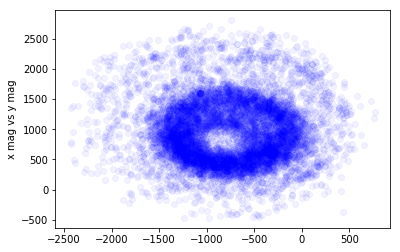

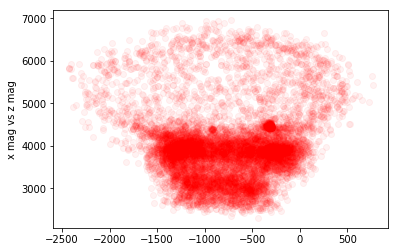

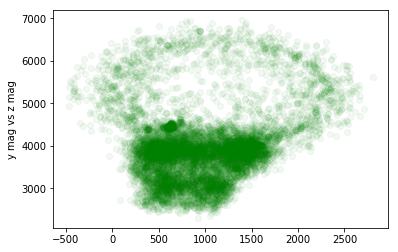

10200  samples


In [2]:
plt.plot(x_list,y_list,'bo',alpha=0.05)
plt.ylabel('x mag vs y mag')
plt.show()

plt.plot(x_list,z_list,'ro',alpha=0.05)
plt.ylabel('x mag vs z mag')
plt.show()

plt.plot(y_list,z_list,'go',alpha=0.05)
plt.ylabel('y mag vs z mag')
plt.show()


print(len(x_list), " samples")


    

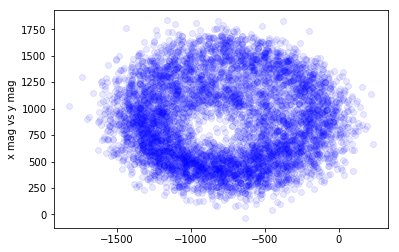

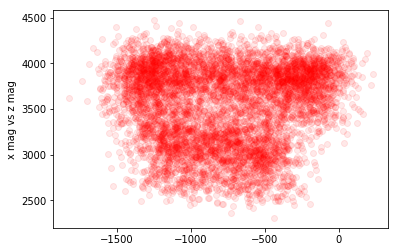

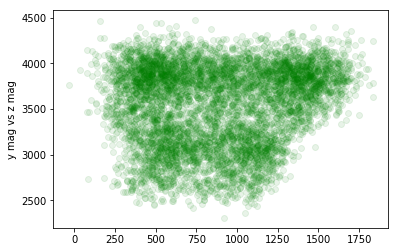

10200  samples


In [3]:
#plot only the points with data from it spinning
#which is 4000 through 8000
s1 = 4000
s2 = 10200
plt.plot(x_list[s1:s2],y_list[s1:s2],'bo',alpha=0.09)
plt.ylabel('x mag vs y mag')
plt.show()

plt.plot(x_list[s1:s2],z_list[s1:s2],'ro',alpha=0.09)
plt.ylabel('x mag vs z mag')
plt.show()

plt.plot(y_list[s1:s2],z_list[s1:s2],'go',alpha=0.09)
plt.ylabel('y mag vs z mag')
plt.show()

print(len(x_list), " samples")

-763.5603316489517   909.5240528665444  r  538.8018083400591


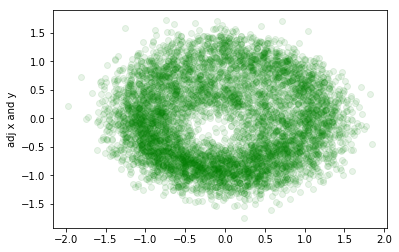

In [4]:
x_new_list = x_list[s1:s2]
y_new_list = y_list[s1:s2]

import math
import circle_fit as cf

data = list(zip(x_new_list, y_new_list))

xc,yc,r,_ = cf.least_squares_circle((data))
print(xc, " ", yc, " r ", r)



midpoint_x = xc
midpoint_y =  yc

adj_comp_x = []
adj_comp_y = []
for i in x_new_list:
    val = (i-midpoint_x)/r
    adj_comp_x.append(val)

for i in y_new_list:
    val = (i-midpoint_y)/r
    adj_comp_y.append(val)  
    

plt.plot(adj_comp_x,adj_comp_y,'go',alpha=0.09)
plt.ylabel('adj x and y')
plt.show()    
    

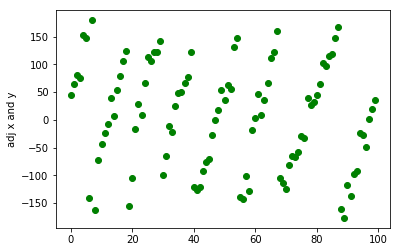

In [5]:
angle_l = []
for i in range(100):
    angle = math.degrees(math.atan2(adj_comp_y[i+100], adj_comp_x[i+100]))
    angle_l.append(angle)
    
plt.plot(angle_l,'go',alpha=1)
plt.ylabel('adj x and y')
plt.show()   

 Starting Zumi 
Pi Zero I2C is available
Gyro offset file already exists.
Verified Pi Zero is the same
Gyroscope previously calibrated
Zumi board detected
Compass detected
OLED Screen detected
Gyroscope & Accelerometer detected
Creating new offset file...
.
.
start
done


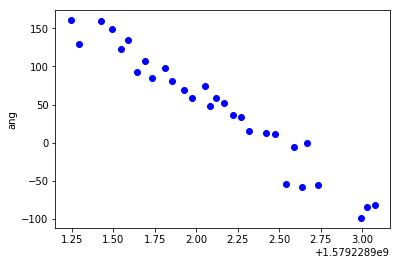

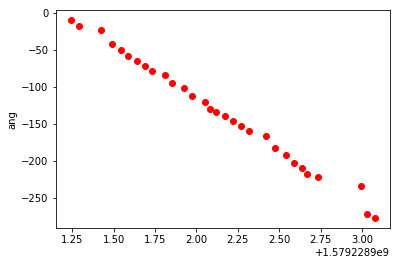

In [29]:
from zumi.zumi import Zumi
zumi = Zumi() 

angle_list = []
z_ang = []
x_new_list = []
y_new_list = []
z_new_list = []
time_list = []
midpoint_x = xc
midpoint_y =  yc
zumi.reset_gyro()
zumi.mpu.calibrate_MPU(100)
print("start")

zumi.control_motors(-3,3)
for i in range(30):
    
    ang_value = zumi.update_angles()[2]
    z_ang.append(ang_value)
    [x,y,z,t] = zumi.compass.get_data()

    x_new = -1*(x-midpoint_x)/r
    x_new_list.append(x_new)
    y_new = (y-midpoint_y)/r
    y_new_list.append(y_new)
    time_list.append(time.time())

    angle = math.degrees(math.atan2(y_new, x_new))
    angle_list.append(angle)
zumi.stop()
print("done")    
plt.plot(time_list,angle_list,'bo')
plt.ylabel('ang')
plt.show()

plt.plot(time_list,z_ang,'ro')
plt.ylabel('ang')
plt.show()


In [18]:
zumi.stop()

In [27]:
zumi.right_circle()